In [1]:
import matplotlib
import imageio
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import signal
import numpy as np 
import pandas as pd

In [2]:
import os
import re 

files = {os.path.splitext(k)[0]: {} for k in os.listdir('data') if '.csv' in os.path.splitext(k)[1]}


for i,file in enumerate(os.listdir('data')):
    ext = os.path.splitext(file)[1]
    name = os.path.splitext(file)[0]
    if '.csv' in ext:
        df = pd.read_csv(f'data/{file}')
        files[name] = df


In [3]:
files.keys()

dict_keys(['data_ej_4_a', '21', 'data_ej_4_b', 'data_ej_4_20', 'data_ej_5_a', '22', '28', '27', '20', 'data_ej_5_c', 'data4RuidoAmps', 'data4TRANSF', '24', '29', 'data_ej_5_b', '25', 'data_ej_4_18', 'data_ej_4_d', 'data4RuidoFrecs', 'data_ej_4_c', 'data_ej_5_d', 'data_ej_4_f', '26', '23'])

In [4]:
import seaborn as sns
plt.style.use('seaborn-darkgrid')

In [6]:
df4Tr = files['data4TRANSF']
df4Tr.columns[1]

'amp'

A*x+B
A: 5.0891546149594555e-05    B: -5.415561220031235e-06


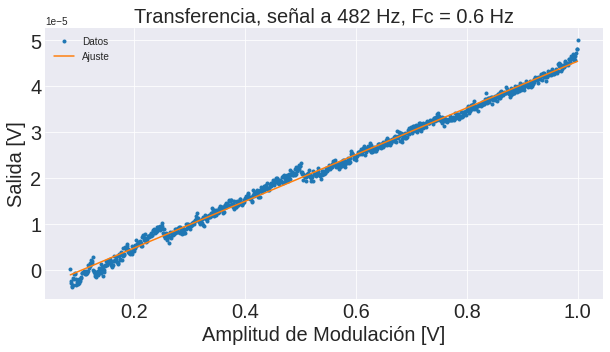

In [55]:
%matplotlib inline
plt.figure(figsize=(10,5))
amp=df4Tr['amp']/8192
x=df4Tr['X']
plt.plot(amp,x,'.',label='Datos')
param = np.polyfit(amp,x,1)
mod = np.polyval(param,amp)
print('A*x+B')
print('A:',param[0] , '   B:',param[1])
plt.plot(amp, mod  ,'-', label='Ajuste')
plt.legend()
plt.ylabel(r'Salida [V]',fontsize=20)
plt.xlabel(r'Amplitud de Modulación [V]',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
plt.title(f"Transferencia, señal a 482 Hz, Fc = 0.6 Hz",fontsize=20)
plt.savefig("Transferencia")

In [57]:
df4RF = files['data4RuidoFrecs']
df4RF.columns
df26 = files['26']
df26.columns

Index(['Unnamed: 0', 'frec', 'X', 'Y'], dtype='object')

In [70]:
#for i in range(len(df4RF['frec'])):
frec = df4RF['frec'].tolist()
xf   = df4RF['X'].tolist()
frec.pop(7)
xf.pop(7)
frec = np.array(frec)
xf = np.array(xf)

frec26 =df26['frec'].tolist()
x26= df26['X'].tolist()
frec26 = np.array(frec26)
x26 = np.array(x26)
xmin=min(x26)
x26 = x26 -xmin

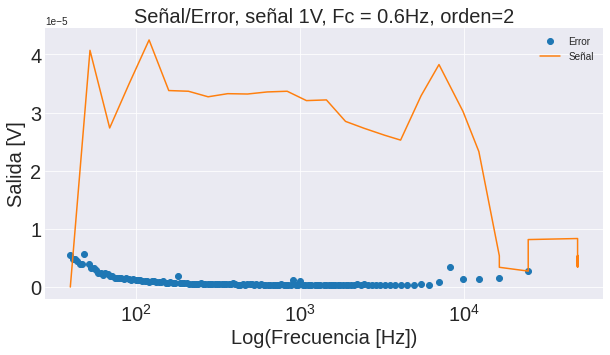

In [80]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.semilogx(1e9/((1+frec)*2520*8),xf,'o',label='Error')
plt.semilogx(1e9/((1+frec26)*2520*8),x26,'-',label='Señal')
plt.ylabel(r'Salida [V]',fontsize=20)
plt.xlabel(r'Log(Frecuencia [Hz])',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
plt.title(f"Señal/Error, señal 1V, Fc = 0.6Hz, orden=2",fontsize=20)
plt.legend()
plt.savefig("SeñalError")

In [75]:
df4RA = files['data4RuidoAmps']
df4RA.columns

amp=df4Tr['amp']/8192
x=df4Tr['X']
ampra=(df4RA['amp']/8192).tolist()
xra=df4RA['X'].tolist()
ampra.pop(0)
xra.pop(0)
ampra.pop(22)
xra.pop(22)

2.3547935732255337e-06

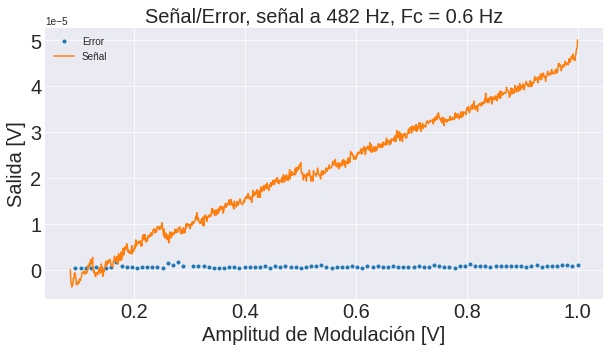

In [82]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(ampra,xra,'.',label='Error')
plt.plot(amp,x,label='Señal')
plt.legend()
plt.ylabel(r'Salida [V]',fontsize=20)
plt.xlabel(r'Amplitud de Modulación [V]',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
plt.title(f"Señal/Error, señal a 482 Hz, Fc = 0.6 Hz",fontsize=20)
plt.savefig("TransError")